### Exploratory Data Analysis
1. Distribution of Male and Female
2. Distribution of size of all images
3. Make the decision of width & height to resize using above chart

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import cv2

from glob import glob

In [4]:
# extract path of male and female in crop_data folder and put them in a list

fpath = glob('./crop_data/female/*.jpg')
mpath = glob('./crop_data/male/*.jpg')

In [5]:
df_female = pd.DataFrame(fpath, columns=['filepath'])
df_female['gender'] = 'female'

df_male = pd.DataFrame(mpath, columns=['filepath'])
df_male['gender'] = 'male'

df = pd.concat((df_female, df_male), axis=0)

In [6]:
df.head()

,filepath,gender
0,./crop_data/female/female_2.jpg,female
1,./crop_data/female/female_3933.jpg,female
2,./crop_data/female/female_4084.jpg,female
3,./crop_data/female/female_98.jpg,female
4,./crop_data/female/female_1842.jpg,female


In [7]:
df.tail()

,filepath,gender
2867,./crop_data/male/male_1156.jpg,male
2868,./crop_data/male/male_1142.jpg,male
2869,./crop_data/male/male_622.jpg,male
2870,./crop_data/male/male_4984.jpg,male
2871,./crop_data/male/male_3033.jpg,male


In [8]:
df.shape

(6117, 2)

In [9]:
def get_size(path):
    img = cv2.imread(path)
    return img.shape[0]

In [10]:
df['dimension'] = df['filepath'].apply(get_size)

In [11]:
df

,filepath,gender,dimension
0,./crop_data/female/female_2.jpg,female,101
1,./crop_data/female/female_3933.jpg,female,131
2,./crop_data/female/female_4084.jpg,female,176
3,./crop_data/female/female_98.jpg,female,226
4,./crop_data/female/female_1842.jpg,female,58
...,...,...,...
2867,./crop_data/male/male_1156.jpg,male,67
2868,./crop_data/male/male_1142.jpg,male,73
2869,./crop_data/male/male_622.jpg,male,121
2870,./crop_data/male/male_4984.jpg,male,158


In [12]:
dist_gender = df['gender'].value_counts()

dist_gender

gender
female    3245
male      2872
Name: count, dtype: int64

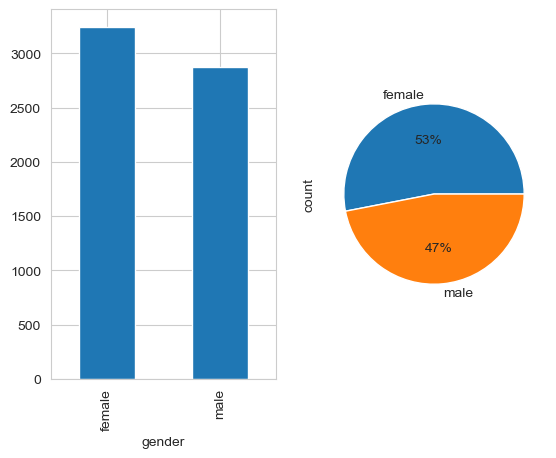

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=2)
dist_gender.plot(kind='bar', ax=ax[0])
dist_gender.plot(kind='pie', ax=ax[1], autopct='%0.0f%%')
plt.show()

/opt/anaconda3/envs/face_recognition/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


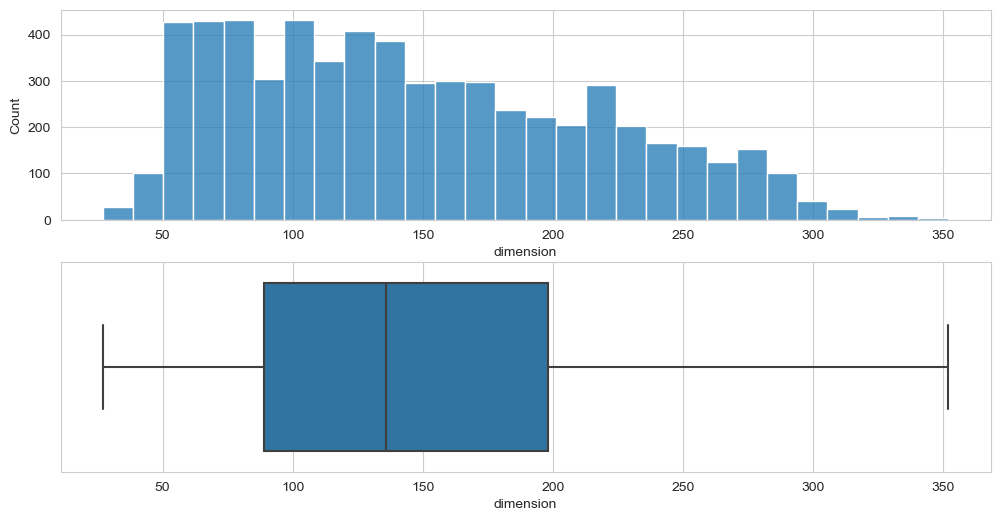

In [14]:
plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
sns.histplot(df['dimension'])
plt.subplot(2,1,2)
sns.boxplot(x=df['dimension'])
plt.show()

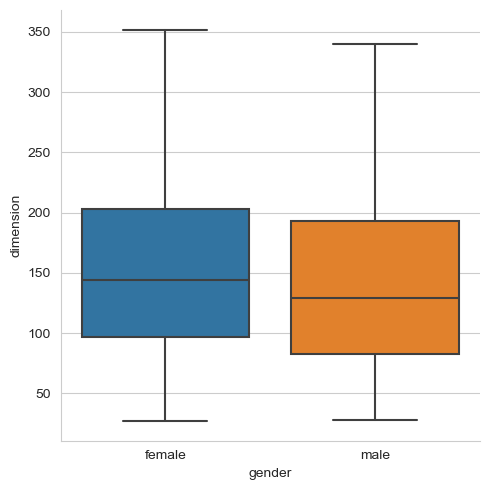

In [15]:
sns.catplot(data=df, x='gender', y='dimension', kind='box')

1. We have almost equal istribution of gender(numbers)
2. Most of the images are having dimension more than 90
3. Female most of the female images are HD compare to male images
------------
- **Consider the image with dimensions more than 60**
- **Resize all the image into 100x100**


In [16]:
df_filter = df.query('dimension > 60')

df_filter

,filepath,gender,dimension
0,./crop_data/female/female_2.jpg,female,101
1,./crop_data/female/female_3933.jpg,female,131
2,./crop_data/female/female_4084.jpg,female,176
3,./crop_data/female/female_98.jpg,female,226
5,./crop_data/female/female_2393.jpg,female,205
...,...,...,...
2867,./crop_data/male/male_1156.jpg,male,67
2868,./crop_data/male/male_1142.jpg,male,73
2869,./crop_data/male/male_622.jpg,male,121
2870,./crop_data/male/male_4984.jpg,male,158


In [17]:
df_filter.shape

(5608, 3)

In [18]:
df_filter['gender'].value_counts(normalize=True)

gender
female    0.536377
male      0.463623
Name: proportion, dtype: float64

In [19]:
def structuring(path):
    try:
        # 1 - read image
        img =  cv2.imread(path)
        # 2 - convert into grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # 3 - resize into 100X100
        ## INTER_AREA for shrink vs INTER_CUBIC for enlarge
        size = gray.shape[0]
        if size >= 100:
            gray_resize = cv2.resize(gray, (100, 100), interpolation=cv2.INTER_AREA) 
        else:
            gray_resize = cv2.resize(gray, (100, 100), interpolation=cv2.INTER_CUBIC) 
    
        # 4 - flatten image (1x10,000)
        flatten_image = gray_resize.flatten()
        print(f"success {path}")
        return flatten_image
    
    except:
        print(f"fail {path}")
        return None

In [20]:
df_filter.loc[:, 'data'] = df_filter['filepath'].apply(structuring)

success ./crop_data/female/female_2.jpg
success ./crop_data/female/female_3933.jpg
success ./crop_data/female/female_4084.jpg
success ./crop_data/female/female_98.jpg
success ./crop_data/female/female_2393.jpg
success ./crop_data/female/female_3099.jpg
success ./crop_data/female/female_3927.jpg
success ./crop_data/female/female_1103.jpg
success ./crop_data/female/female_414.jpg
success ./crop_data/female/female_67.jpg
success ./crop_data/female/female_3072.jpg
success ./crop_data/female/female_2378.jpg
success ./crop_data/female/female_4709.jpg
success ./crop_data/female/female_73.jpg
success ./crop_data/female/female_366.jpg
success ./crop_data/female/female_1117.jpg
success ./crop_data/female/female_3700.jpg
success ./crop_data/female/female_3728.jpg
success ./crop_data/female/female_2436.jpg
success ./crop_data/female/female_2350.jpg
success ./crop_data/female/female_4721.jpg
success ./crop_data/female/female_1881.jpg
success ./crop_data/female/female_1895.jpg
success ./crop_data/fe

/var/folders/6z/x70pqn912y166ykwnf1ltz2m0000gn/T/ipykernel_46777/2082649009.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter.loc[:, 'data'] = df_filter['filepath'].apply(structuring)


In [21]:
df_filter.head()

,filepath,gender,dimension,data
0,./crop_data/female/female_2.jpg,female,101,"[28, 27, 35, 36, 36, 12, 48, 85, 69, 87, 206, ..."
1,./crop_data/female/female_3933.jpg,female,131,"[164, 135, 110, 94, 83, 76, 69, 72, 71, 66, 62..."
2,./crop_data/female/female_4084.jpg,female,176,"[39, 37, 24, 25, 38, 33, 52, 58, 57, 48, 40, 4..."
3,./crop_data/female/female_98.jpg,female,226,"[95, 95, 92, 93, 100, 92, 75, 85, 99, 115, 105..."
5,./crop_data/female/female_2393.jpg,female,205,"[36, 52, 39, 47, 52, 60, 61, 44, 47, 49, 44, 4..."
...,...,...,...,...
2867,./crop_data/male/male_1156.jpg,male,67,"[155, 154, 148, 135, 145, 162, 167, 176, 146, ..."
2868,./crop_data/male/male_1142.jpg,male,73,"[79, 82, 57, 29, 84, 106, 81, 47, 56, 67, 70, ..."
2869,./crop_data/male/male_622.jpg,male,121,"[110, 108, 103, 100, 110, 125, 145, 152, 147, ..."
2870,./crop_data/male/male_4984.jpg,male,158,"[100, 111, 118, 124, 130, 140, 143, 130, 139, ..."


In [22]:
data = df_filter['data'].apply(pd.Series)

In [23]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,28,27,35,36,36,12,48,85,69,87,...,43,11,25,41,35,43,54,52,56,95
1,164,135,110,94,83,76,69,72,71,66,...,131,131,130,133,137,133,131,121,122,140
2,39,37,24,25,38,33,52,58,57,48,...,143,142,142,143,143,141,143,143,142,143
3,95,95,92,93,100,92,75,85,99,115,...,134,98,45,66,78,79,67,89,155,146
5,36,52,39,47,52,60,61,44,47,49,...,138,211,247,250,252,253,254,255,255,255


In [24]:
data.columns = [f"pixel_{i}" for i in data.columns]

data.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_9990,pixel_9991,pixel_9992,pixel_9993,pixel_9994,pixel_9995,pixel_9996,pixel_9997,pixel_9998,pixel_9999
0,28,27,35,36,36,12,48,85,69,87,...,43,11,25,41,35,43,54,52,56,95
1,164,135,110,94,83,76,69,72,71,66,...,131,131,130,133,137,133,131,121,122,140
2,39,37,24,25,38,33,52,58,57,48,...,143,142,142,143,143,141,143,143,142,143
3,95,95,92,93,100,92,75,85,99,115,...,134,98,45,66,78,79,67,89,155,146
5,36,52,39,47,52,60,61,44,47,49,...,138,211,247,250,252,253,254,255,255,255


In [25]:
# Data Normalization
data = data / 255.0

In [27]:
data['gender'] = df_filter['gender']

data.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_9991,pixel_9992,pixel_9993,pixel_9994,pixel_9995,pixel_9996,pixel_9997,pixel_9998,pixel_9999,gender
0,0.109804,0.105882,0.137255,0.141176,0.141176,0.047059,0.188235,0.333333,0.270588,0.341176,...,0.043137,0.098039,0.160784,0.137255,0.168627,0.211765,0.203922,0.219608,0.372549,female
1,0.643137,0.529412,0.431373,0.368627,0.325490,0.298039,0.270588,0.282353,0.278431,0.258824,...,0.513725,0.509804,0.521569,0.537255,0.521569,0.513725,0.474510,0.478431,0.549020,female
2,0.152941,0.145098,0.094118,0.098039,0.149020,0.129412,0.203922,0.227451,0.223529,0.188235,...,0.556863,0.556863,0.560784,0.560784,0.552941,0.560784,0.560784,0.556863,0.560784,female
3,0.372549,0.372549,0.360784,0.364706,0.392157,0.360784,0.294118,0.333333,0.388235,0.450980,...,0.384314,0.176471,0.258824,0.305882,0.309804,0.262745,0.349020,0.607843,0.572549,female
5,0.141176,0.203922,0.152941,0.184314,0.203922,0.235294,0.239216,0.172549,0.184314,0.192157,...,0.827451,0.968627,0.980392,0.988235,0.992157,0.996078,1.000000,1.000000,1.000000,female


In [30]:
## Missing valuse
count_of_na = data.isnull().sum().sum()

print(count_of_na)

0


## Save the data for future study

In [32]:
import pickle

In [33]:
pickle.dump(data, open('./data/data_images_100_100.pickle', mode='wb'))